In [1]:
import pandas as pd
import numpy as np
from babel.numbers import format_currency

# Use case reale: `MiMocko` 🛵

Il business vuole provare a capire quali viaggi sono più a rischio di risultare in un incidente.

Carichiamo il dataset preparato per l'uso nel notebook di _preprocessing_.

In [2]:
path = '../../data'

dataset = pd.read_csv(f'{path}/dataset_classificazione.csv')

In [3]:
dataset.head()

,idUtente,idVeicolo,carica_batteria_inizio,carica_batteria_fine,distanza_percorsa,tempo_viaggio,due_caschi_disponibili,lat_ritiro,lon_ritiro,lat_consegna,lon_consegna,punteggioViaggio,incidente
0,5954,33,1.0,0.902,4.5046,800.0,1,44.395187,8.943839,44.433997,8.958993,7.55,0
1,3403,103,1.0,0.826,9.2642,1661.0,1,44.500364,8.903750,44.418102,8.921511,8.02,0
2,3723,6,1.0,0.842,9.4183,1725.0,1,44.404962,8.958834,44.427686,8.845441,8.23,0
3,8584,95,1.0,0.880,5.4345,1117.0,1,44.416055,8.933609,44.421707,8.865676,5.20,0
4,4677,72,1.0,0.960,2.9638,558.0,1,44.418413,8.927100,44.403133,8.957791,5.34,0


In [4]:
dataset.dtypes

idUtente                    int64
idVeicolo                   int64
carica_batteria_inizio    float64
carica_batteria_fine      float64
distanza_percorsa         float64
tempo_viaggio             float64
due_caschi_disponibili      int64
lat_ritiro                float64
lon_ritiro                float64
lat_consegna              float64
lon_consegna              float64
punteggioViaggio          float64
incidente                   int64
dtype: object

## Classificazione incidenti

In [5]:
features = list(dataset.columns)[:-1]
target = 'incidente'

display(target)
print()
display(features)

'incidente'

['idUtente',
 'idVeicolo',
 'carica_batteria_inizio',
 'carica_batteria_fine',
 'distanza_percorsa',
 'tempo_viaggio',
 'due_caschi_disponibili',
 'lat_ritiro',
 'lon_ritiro',
 'lat_consegna',
 'lon_consegna',
 'punteggioViaggio']

In [6]:
dfX = dataset[features]
dfy = dataset[target]

In [7]:
dfX.head()

,idUtente,idVeicolo,carica_batteria_inizio,carica_batteria_fine,distanza_percorsa,tempo_viaggio,due_caschi_disponibili,lat_ritiro,lon_ritiro,lat_consegna,lon_consegna,punteggioViaggio
0,5954,33,1.0,0.902,4.5046,800.0,1,44.395187,8.943839,44.433997,8.958993,7.55
1,3403,103,1.0,0.826,9.2642,1661.0,1,44.500364,8.903750,44.418102,8.921511,8.02
2,3723,6,1.0,0.842,9.4183,1725.0,1,44.404962,8.958834,44.427686,8.845441,8.23
3,8584,95,1.0,0.880,5.4345,1117.0,1,44.416055,8.933609,44.421707,8.865676,5.20
4,4677,72,1.0,0.960,2.9638,558.0,1,44.418413,8.927100,44.403133,8.957791,5.34


In [8]:
dfy.head()

0    0
1    0
2    0
3    0
4    0
Name: incidente, dtype: int64

### Esercizio
Visualizza la distribuzione della target feature. Cosa noti?

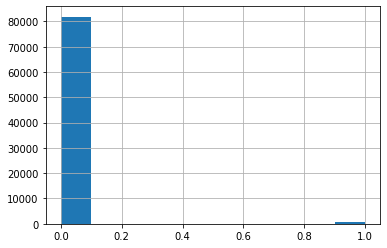

In [9]:
dfy.hist();

### Esercizio
Calcola il rate di incidenti sul totale viaggi

In [10]:
rate_incidente = dfy.sum()/len(dfy)
rate_incidente

0.0063739892674161665

In [44]:
len(dfy)

82366

## Train/Test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.33)
X_train.head()

,idUtente,idVeicolo,carica_batteria_inizio,carica_batteria_fine,distanza_percorsa,tempo_viaggio,due_caschi_disponibili,lat_ritiro,lon_ritiro,lat_consegna,lon_consegna,punteggioViaggio
17243,8237,8,1.0,0.985,1.3734,276.0,1,44.412992,8.942201,44.406634,8.956793,5.59
77619,6483,91,1.0,0.854,6.8563,1259.0,1,44.410864,8.940977,44.423178,8.856676,7.46
55859,8796,32,1.0,0.933,0.0129,6.0,1,44.436156,8.879053,44.435973,8.879099,8.43
79106,673,42,1.0,0.899,5.7239,972.0,1,44.463144,8.900505,44.421233,8.859474,7.82
70141,1072,51,1.0,0.885,7.3111,1339.0,1,44.415518,8.885728,44.411063,8.977348,5.28


### Esercizio
Verifica che il rate di incidenti nel train e nel test set sia comparabile.

_Approfondimento (BONUS): [stratification](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)_

In [13]:
rate_train = y_train.sum()/len(y_train)
rate_test = y_test.sum()/len(y_test)

rate_train, rate_test, abs((rate_test - rate_train)/rate_train)

(0.0062516988312041315, 0.006622272911224753, 0.0592757408867768)

## Decision tree

### Esercizio
Allena il modello sul training set e confronta le performance di classificazione su training e test set sfruttando `plot_confusion_matrix`

Cosa noti?

**Hint**: prova ad impostare il parametro `normalize='true'` nella `plot_confusion_matrix`.

In [14]:
from sklearn import tree

In [15]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [16]:
from sklearn.metrics import plot_confusion_matrix

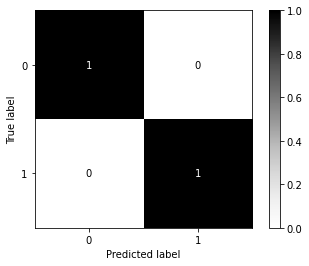

In [17]:
plot_confusion_matrix(model, X_train, y_train, cmap='Greys', normalize='true');

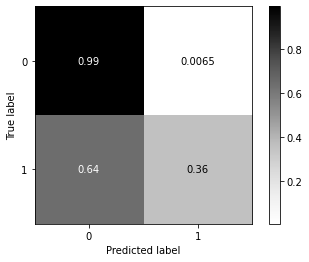

In [18]:
plot_confusion_matrix(model, X_test, y_test, cmap='Greys', normalize='true');

### Esercizio

Prova a riallenare il modello scegliendo un valore di `max_depth` che renda più simili le performance su training e test set

In [19]:
model = tree.DecisionTreeClassifier(max_depth=25).fit(X_train, y_train)

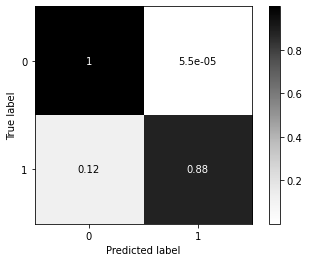

In [20]:
plot_confusion_matrix(model, X_train, y_train, cmap='Greys', normalize='true');

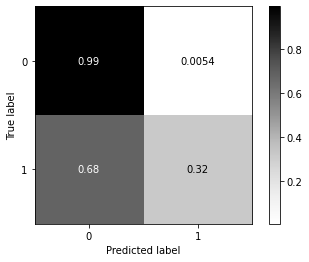

In [21]:
plot_confusion_matrix(model, X_test, y_test, cmap='Greys', normalize='true');

### Esercizio
Task di classificazione su dataset _sbilanciati_ sono più complicati.

Alcuni algoritmi, tra cui il DecisionTree, supportano un keyword argument `class_weight` con cui modificare il peso assegnato a ciascuna classe in fase di allenamento.

Prova a settare i pesi delle due classi per "ribilanciare" il dataset.

In [22]:
class_weight = {
    0: len(y_train)/(len(y_train) - y_train.sum()), 
    1: len(y_train)/y_train.sum()
}
class_weight

{0: 1.0062910284463895, 1: 159.95652173913044}

In [23]:
(len(y_train) - y_train.sum())/y_train.sum()

158.95652173913044

In [46]:
1/rate_incidente

156.88761904761907

In [24]:
model = tree.DecisionTreeClassifier(max_depth=25, class_weight=class_weight).fit(X_train, y_train)

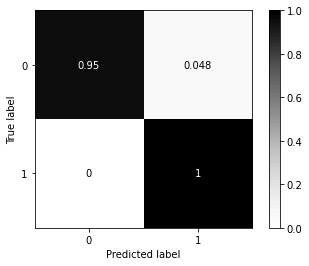

In [25]:
plot_confusion_matrix(model, X_train, y_train, cmap='Greys', normalize='true');

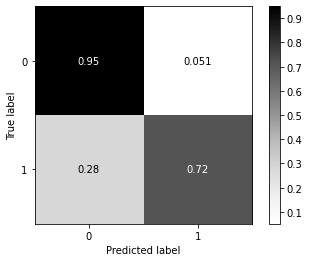

In [26]:
plot_confusion_matrix(model, X_test, y_test, cmap='Greys', normalize='true');

## Interpretazione business 🤑

### Domanda

In questo contesto di business, secondo te è più alto il costo di un falso positivo o di un falso negativo?

```
- dipende dal confronto tra il costo di un incidente e il ricavo di un viaggio
- probabilmente il costo di incidente è maggiore
- in questo caso, è preferibile classificare correttamente tutti gli incidenti al "costo" di avere molti falsi positivi e meno falsi negativi
- ciò equivale a cercare un'alta recall a scapito della precision
```

### Domanda 
Il Business vorrebbe usare il nostro modello come segue:

* se il modello classifica il viaggio imminente come "incidente", lo scooter si spegne e impedisce all'utente di partire 🚳


Secondo te

1. è un utilizzo _concretamente_ possibile?
2. vedi delle controindicazioni?

```
1. in realtà non ho tutte le feature al momento del pickup
2. se ho un modello con bassa precision, per contrastare tutti i potenziali incidenti sto impedendo molti viaggi a clienti virtuosi, che potrebbero quindi abbandonare il servizio insoddisfatti
```

### Domanda

* Quali alternative ti vengono in mente per utilizzare effettivamente un modello come richiede il Business?
* Quali potrebbero essere le difficoltà?

```
1. potrei
    - provare a riallenarlo usando solo le feture disponibili al momento del pickup
    - provare a riallenarlo utilizzando, in corrispondenza delle feature non disponibili al pickup, valori ricostruiti sulla base delle altre (es. driving score medio per quell'utente, etc.)
2. nei due casi
    - le performance potrebbero calare
    - le performance potrebbero calare, la gestione dei modelli che stimano le feature mancanti sarebbe a sua volta complessa                                                                                                                                                
```

### Esercizio

⚠️ supponiamo che tutte le features siano disponibili al momento del ritiro dello scooter ⚠️ 

Il Business ci chiede di stimare **come cambierebbe il profitto su base annua** in caso di utilizzo del modello di classificazione.

Ricordiamo che il profitto (P) coincide con la differenza tra ricavo (R) e costo (C), in formula $P  = R - C$.

Sappiamo che:
    
* il pricing di MiMocko è 0.26 EUR/minuto
* la durata media di un viaggio è circa 18 minuti
* il costo medio di un intervento di riparazione a seguito incidente è circa 200 EUR
* il numero medio di viaggi all'anno è circa 50'000

#### Hint

Salva in delle variabili i dati del problema, e inizia calcolando il _ricavo medio per viaggio_.

In [27]:
prezzo_al_minuto = 0.26
minuti_viaggio = 18
costo_riparazione = 200
viaggi_annui = 50_000

In [28]:
ricavo_per_viaggio = minuti_viaggio * prezzo_al_minuto

#### Hint
E' utile salvare in una variabile la matrice di confusione del modello.

* bisogna scegliere quella calcolata sul training o test set?
* conviene normalizzarla o no?

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, model.predict(X_test), normalize='all'))
model_confusion_matrix

,0,1
0,0.942975,0.050403
1,0.001876,0.004746


#### Hint
Costruisci, sulla falsa riga della confusion matrix, altre 4 matrici:
    
1. matrice dei ricavi medi per viaggio 
2. matrice dei costi medi per viaggio 

che riflettano

1. la situazione attuale
2. la situazione in cui si usasse il modello di classificazione

In [31]:
matrix = pd.DataFrame(index=model_confusion_matrix.index, columns=model_confusion_matrix.columns)

In [32]:
matrice_ricavi_actual = matrix.fillna(ricavo_per_viaggio)
matrice_ricavi_actual

,0,1
0,4.68,4.68
1,4.68,4.68


In [33]:
matrice_costi_actual = matrix.fillna(0.0)
matrice_costi_actual.at[1, :] = costo_riparazione
matrice_costi_actual

,0,1
0,0.0,0.0
1,200.0,200.0


In [34]:
matrice_ricavi_model = matrix.fillna(ricavo_per_viaggio)
matrice_ricavi_model.at[:, 1] = 0.0
matrice_ricavi_model

,0,1
0,4.68,0.0
1,4.68,0.0


In [35]:
matrice_costi_model = matrix.fillna(0.0)
matrice_costi_model.at[1, 0] = costo_riparazione
matrice_costi_model

,0,1
0,0.0,0.0
1,200.0,0.0


#### Hint

Calcola, in ciascuno dei due scenari (attuale vs uso modello), la matrice dei profitti.

In [36]:
def matrice_profitti(matrice_ricavi, matrice_costi):
    return matrice_ricavi - matrice_costi

In [37]:
matrice_profitti_actual = matrice_profitti(matrice_ricavi_actual, matrice_costi_actual)
matrice_profitti_actual

,0,1
0,4.68,4.68
1,-195.32,-195.32


In [38]:
matrice_profitti_model = matrice_profitti(matrice_ricavi_model, matrice_costi_model)
matrice_profitti_model

,0,1
0,4.68,0.0
1,-195.32,0.0


#### Hint

* utilizza la confusion matrix del modello salvata in precedenza per stimare il profitto atteso su base annua in entrambi gli scenari
* comunica al Business la variazione di profitto nei due scenari

In [39]:
def profitto_atteso(matrice_profitti):
    return (matrice_profitti * viaggi_annui * model_confusion_matrix).sum().sum()

In [48]:
pd.DataFrame([[1,2],[3,4]]) * pd.DataFrame([[2,2], [2,2]])

,0,1
0,2,4
1,6,8


In [40]:
profitto_atteso_actual = profitto_atteso(matrice_profitti_actual)
profitto_atteso_model = profitto_atteso(matrice_profitti_model)

In [41]:
delta_profitto = profitto_atteso_model - profitto_atteso_actual
print(
    f"""
    Il delta di profitto atteso su base annua è {format_currency(delta_profitto, locale='it_IT', currency='EUR')}, 
    pari al {100*delta_profitto/profitto_atteso_actual:.0f}% del profitto attuale.
    """
)


    Il delta di profitto atteso su base annua è 34.554,80 €, 
    pari al 21% del profitto attuale.
    


### Esercizio (BONUS)

Il dipartimento di Customer Satisfaction di MiMocko mette in guardia circa l'utilizzo del modello ✋

Alcuni clienti, vedendosi rifiutare il viaggio, potrebbero smettere di utilizzare il servizio!

Sapendo che
* il numero medio di clienti per anno è 7900
> calcolato tramite
> ```python
> (
>     viaggi[viaggi['anno'].isin([2019, 2020])]
>     .groupby('anno')['idUtente'].apply(lambda x: len(set(x)))
>     .mean()
> )
> ```
* il numero medio di viaggi per utente all'anno è 4
> calcolato tramite
> ```python
> (
>     viaggi[viaggi['anno'].isin([2019, 2020])]
>     .groupby(['anno', 'idUtente'])
>     .size()
>     .unstack()
>     .transpose()
>     .mean()
>     .mean()
> )
> ```

rispondi alla domanda del Business: se adottiamo il modello, qual è il [_churn rate_](https://en.wikipedia.org/wiki/Churn_rate) annuale massimo che possiamo tollerare?

**Hint** l'obiettivo del Business è capire qual è il numero massimo di clienti che possono abbandonare MiMocko su base annua affinchè i profitti derivanti dall'utilizzo del modello siano ancora maggiori di quelli attuali...

In [42]:
clienti_annui = 7_900
viaggi_per_cliente = 4
ricavo_per_cliente = ricavo_per_viaggio * viaggi_per_cliente

max_clienti_abbandono = round(delta_profitto/ricavo_per_cliente)

max_clienti_abbandono

1846

In [43]:
max_churn = max_clienti_abbandono / clienti_annui
print(f"Il churn rate annuo massimo per non andare in perdita è circa {100*max_churn:.0f}%.")

Il churn rate annuo massimo per non andare in perdita è circa 23%.


## Approfondimenti (BONUS)

* [feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
* [K-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)
* [guida visuale alla confusion matrix](https://towardsdatascience.com/visual-guide-to-the-confusion-matrix-bb63730c8eba)
* [bilanciamento sintetico con SMOTE](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn) 
* [Ensemble learning](https://scikit-learn.org/stable/modules/ensemble.html#forest)